# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import shapiro, mannwhitneyu, ttest_ind



## Load data

In [ ]:
# Load the data files into different DataFrames

try:
    df_megaline_calls = pd.read_csv("/datasets/megaline_calls.csv")
except FileNotFoundError:
    df_megaline_calls = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_calls.csv')
df_megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [3]:
try:
    df_megaline_internet = pd.read_csv("/datasets/megaline_internet.csv")
except FileNotFoundError:
    df_megaline_internet = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_internet.csv')
df_megaline_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [4]:
try:
    df_megaline_messages = pd.read_csv("/datasets/megaline_messages.csv")
except FileNotFoundError:
    df_megaline_messages = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_messages.csv')
df_megaline_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [5]:
try:
    df_megaline_plans = pd.read_csv("/datasets/megaline_plans.csv")
except FileNotFoundError:
    df_megaline_plans = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_plans.csv')
df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
try:
    df_megaline_users = pd.read_csv("/datasets/megaline_users.csv")
except FileNotFoundError:
    df_megaline_users = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/megaline_users.csv')
df_megaline_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [7]:
# Print the general/summary information about the plans' DataFrame

df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Print a sample of data for plans

df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dataframe only has 2 rows and it needs to be placed into rows and columns.

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

the megaline plans dataframe has no errors to fix.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

nothing to change here.

## Users

In [9]:
# Print the general/summary information about the users' DataFrame

df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Print a sample of data for users

display(df_megaline_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [11]:
df_megaline_users['churn_date'] = df_megaline_users['churn_date'].fillna(method='bfill')


filled in missing value for churn date with a date in the cell above.

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [12]:
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'])
df_megaline_users['churn_date'] = pd.to_datetime(df_megaline_users['churn_date'])

print(df_megaline_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  492 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


converted reg date and churn date to datetime format in the cell above.

## Calls

In [13]:
# Print the general/summary information about the calls' DataFrame

df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Print a sample of data for calls

display(df_megaline_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [15]:
# convert call_date to datetime data type

print("Data types before conversion:")
print(df_megaline_calls.dtypes)

df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'], errors='coerce')

print("Data types after conversion:")
print(df_megaline_calls.dtypes)

Data types before conversion:
id            object
user_id        int64
call_date     object
duration     float64
dtype: object
Data types after conversion:
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [16]:
df_megaline_calls['duration'] = df_megaline_calls['duration'].apply(np.ceil).astype(int)
df_megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


## Messages

In [17]:
# Print the general/summary information about the messages' DataFrame

df_megaline_messages.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Print a sample of data for messages

display(df_megaline_messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [19]:
df_megaline_messages['id'] = df_megaline_messages['id'].astype(int)

df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'])


print(df_megaline_messages)

            id  user_id message_date
0      1000125     1000   2018-12-27
1      1000160     1000   2018-12-31
2      1000223     1000   2018-12-31
3      1000251     1000   2018-12-27
4      1000255     1000   2018-12-26
...        ...      ...          ...
76046  1497526     1497   2018-12-24
76047  1497536     1497   2018-12-24
76048  1497547     1497   2018-12-31
76049  1497558     1497   2018-12-24
76050  1497613     1497   2018-12-23

[76051 rows x 3 columns]


changed the datatypes for id to integer and message date to datetime format.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [20]:
# Print the general/summary information about the internet DataFrame

df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Print a sample of data for the internet traffic

display(df_megaline_internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
df_megaline_internet['id'] = df_megaline_internet['id'].astype(str)

df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'])


df_megaline_internet['session_month'] = df_megaline_internet['session_date'].dt.month

print(df_megaline_internet)

              id  user_id session_date  mb_used  session_month
0        1000_13     1000   2018-12-29    89.86             12
1       1000_204     1000   2018-12-31     0.00             12
2       1000_379     1000   2018-12-28   660.40             12
3       1000_413     1000   2018-12-26   270.99             12
4       1000_442     1000   2018-12-27   880.22             12
...          ...      ...          ...      ...            ...
104820  1499_215     1499   2018-10-20   218.06             10
104821  1499_216     1499   2018-12-30   304.72             12
104822  1499_217     1499   2018-09-22   292.75              9
104823  1499_218     1499   2018-12-07     0.00             12
104824  1499_219     1499   2018-12-24   758.31             12

[104825 rows x 5 columns]


### Enrich data

Converted session date into datetime type.

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [23]:
# Print out the plan conditions and make sure they are clear for you

display(df_megaline_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [24]:
df_megaline_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


In [25]:
# Calculate the number of calls made by each user per month. Save the result.

df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])

df_megaline_calls['month'] = df_megaline_calls['call_date'].dt.month

call_counts = df_megaline_calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')

display(call_counts)


,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [26]:
# Calculate the amount of minutes spent by each user per month. Save the result.

df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])

monthly_minutes = df_megaline_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

monthly_minutes.columns = ['user_id', 'month', 'total_minutes']

print(monthly_minutes)

      user_id  month  total_minutes
0        1000     12            124
1        1001      8            182
2        1001      9            315
3        1001     10            393
4        1001     11            426
...       ...    ...            ...
2253     1498     12            339
2254     1499      9            346
2255     1499     10            385
2256     1499     11            308
2257     1499     12            496

[2258 rows x 3 columns]


In [27]:
df_megaline_messages

,id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26
...,...,...,...
76046,1497526,1497,2018-12-24
76047,1497536,1497,2018-12-24
76048,1497547,1497,2018-12-31
76049,1497558,1497,2018-12-24


In [28]:
# Calculate the number of messages sent by each user per month. Save the result.

df_megaline_messages['message_date'] = pd.to_datetime(df_megaline_messages['message_date'])

df_megaline_messages['month'] = df_megaline_messages['message_date'].dt.month

messages_per_user_month = df_megaline_messages.groupby(['user_id', 'month']).size().reset_index(name='message_count')

print(messages_per_user_month)

      user_id  month  message_count
0        1000     12             11
1        1001      8             30
2        1001      9             44
3        1001     10             53
4        1001     11             36
...       ...    ...            ...
1801     1496      9             21
1802     1496     10             18
1803     1496     11             13
1804     1496     12             11
1805     1497     12             50

[1806 rows x 3 columns]


In [29]:
df_megaline_internet

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [30]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

df_megaline_internet['session_date'] = pd.to_datetime(df_megaline_internet['session_date'])

df_megaline_internet['month'] = df_megaline_internet['session_date'].dt.month

monthly_usage = df_megaline_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

monthly_usage.columns=['user_id', 'month', 'mb_used']

print(monthly_usage.head())

   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [31]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

df_megaline_calls_messages = pd.merge(monthly_minutes, messages_per_user_month, on=['user_id', 'month'], how='outer')

df_merged = pd.merge(df_megaline_calls_messages, monthly_usage, on=['user_id', 'month'], how='outer')

df_merged.fillna(0, inplace=True)

display(df_merged)


,user_id,month,total_minutes,message_count,mb_used
0,1000,12,124.0,11.0,1901.47
1,1001,8,182.0,30.0,6919.15
2,1001,9,315.0,44.0,13314.82
3,1001,10,393.0,53.0,22330.49
4,1001,11,426.0,36.0,18504.30
...,...,...,...,...,...
2288,1349,12,0.0,61.0,13039.91
2289,1361,5,0.0,2.0,1519.69
2290,1482,10,0.0,2.0,0.00
2291,1108,12,0.0,0.0,233.17


In [32]:
# Add the plan information

df_merged = df_merged.merge(df_megaline_users, on='user_id')
df_merged = df_merged.merge(df_megaline_plans, left_on='plan', right_on='plan_name')

df_merged

,user_id,month,total_minutes,message_count,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-11-16,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-11-16,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,62.0,42866.10,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,2018-10-13,50,15360,500,20,10,0.03,0.03,surf
2289,1194,12,0.0,56.0,31088.49,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,2018-10-13,50,15360,500,20,10,0.03,0.03,surf
2290,1349,10,0.0,76.0,13093.55,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-10-22,50,15360,500,20,10,0.03,0.03,surf
2291,1349,11,0.0,72.0,17128.26,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-10-22,50,15360,500,20,10,0.03,0.03,surf


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [33]:
df_merged['extra_minutes'] = df_merged['total_minutes'] - df_merged['minutes_included']
df_merged['extra_messages'] = df_merged['message_count'] - df_merged['messages_included']
df_merged['extra_mb'] = df_merged['mb_used'] - df_merged['mb_per_month_included']


df_merged[['extra_minutes', 'extra_messages', 'extra_mb']] = df_merged[['extra_minutes', 'extra_messages', 'extra_mb']].clip(lower=0)


df_merged['extra_minutes_charge'] = df_merged['extra_minutes'] * df_merged['usd_per_minute']
df_merged['extra_messages_charge'] = df_merged['extra_messages'] * df_merged['usd_per_message']
df_merged['extra_data_charge'] = np.ceil(df_merged['extra_mb'] /1024) * df_merged['usd_per_gb']


df_merged['total_charge'] = df_merged['extra_minutes_charge'] + df_merged['extra_messages_charge'] + df_merged['extra_data_charge'] + df_merged['usd_monthly_pay']

display(df_merged)

,user_id,month,total_minutes,message_count,mb_used,first_name,last_name,age,city,reg_date,...,usd_per_message,usd_per_minute,plan_name,extra_minutes,extra_messages,extra_mb,extra_minutes_charge,extra_messages_charge,extra_data_charge,total_charge
0,1000,12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
1,1006,11,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
2,1006,12,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,0.0,1398.82,0.0,0.00,14.0,84.00
3,1008,10,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
4,1008,11,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,62.0,42866.10,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,...,0.03,0.03,surf,0.0,12.0,27506.10,0.0,0.36,270.0,290.36
2289,1194,12,0.0,56.0,31088.49,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,...,0.03,0.03,surf,0.0,6.0,15728.49,0.0,0.18,160.0,180.18
2290,1349,10,0.0,76.0,13093.55,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,0.03,0.03,surf,0.0,26.0,0.00,0.0,0.78,0.0,20.78
2291,1349,11,0.0,72.0,17128.26,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,0.03,0.03,surf,0.0,22.0,1768.26,0.0,0.66,20.0,40.66


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [34]:
df_megaline_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


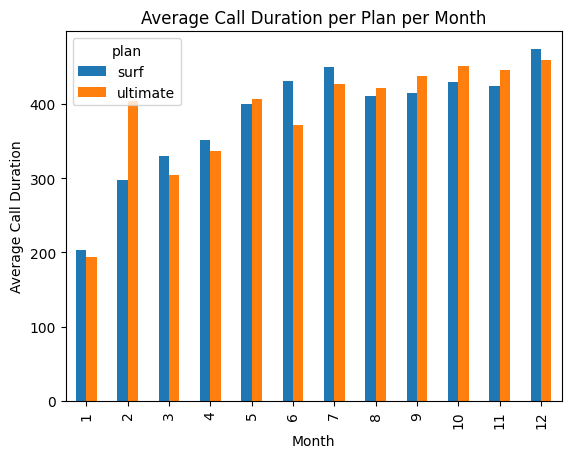

In [35]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

avg_duration = df_merged.groupby(['plan', 'month'])['total_minutes'].mean().unstack(level=0)


display(avg_duration)
avg_duration.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.show()

In [36]:
surf = df_merged[df_merged['plan'] == 'surf']
ultimate = df_merged[df_merged['plan'] == 'ultimate']

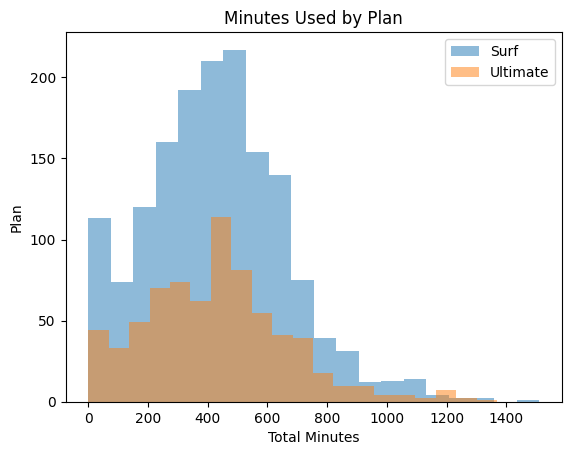

In [37]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf['total_minutes'].plot.hist(bins=20, alpha=0.5, label='Surf')
ultimate['total_minutes'].plot.hist(bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Total Minutes')
plt.ylabel('Plan')
plt.title('Minutes Used by Plan')
plt.legend()
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [38]:
# Calculate the mean and the variance of the monthly call duration

s_mean_duration = surf['total_minutes'].mean()
s_variance_duration = surf['total_minutes'].var()
u_mean_duration = ultimate['total_minutes'].mean()
u_variance_duration = ultimate['total_minutes'].var()

print("Mean call duration (surf):", s_mean_duration)
print("Variance of call duration (surf):", s_variance_duration)
print("Mean call duration(ultimate):", u_mean_duration)
print("Variance of call duration(ultimate):", u_variance_duration)


Mean call duration (surf): 428.7495232040687
Variance of call duration (surf): 54968.27946065038
Mean call duration(ultimate): 430.45
Variance of call duration(ultimate): 57844.464812239225


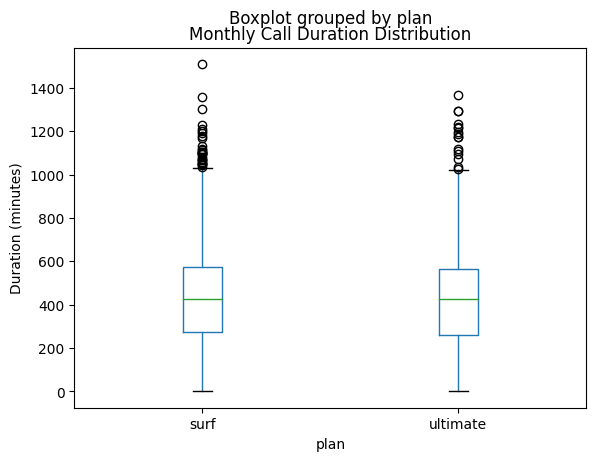

In [39]:
# Plot a boxplot to visualize the distribution of the monthly call duration


df_merged.boxplot(column='total_minutes', by='plan', grid=False)
plt.title("Monthly Call Duration Distribution")
plt.ylabel("Duration (minutes)")
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

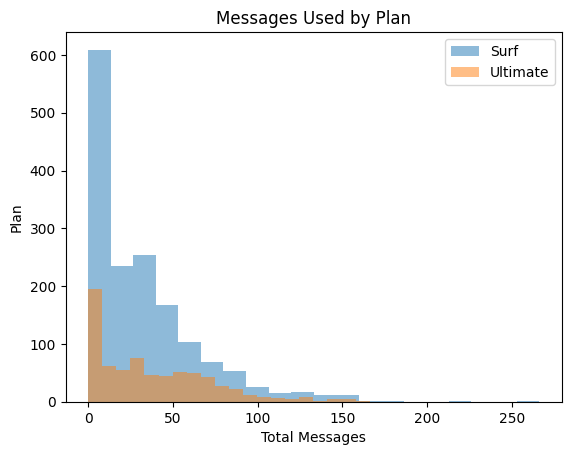

In [40]:
# Compare the number of messages users of each plan tend to send each month

# messages_by_plan = df_merged.groupby('plan_name')['message_count'].agg(['mean', 'count'])

# display(messages_by_plan) 

surf['message_count'].plot.hist(bins=20, alpha=0.5, label='Surf')
ultimate['message_count'].plot.hist(bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Total Messages')
plt.ylabel('Plan')
plt.title('Messages Used by Plan')
plt.legend()
plt.show()

In [41]:
# Compare the amount of internet traffic consumed by users per plan


plan_data_usage = df_merged.groupby('plan_name')['mb_used'].sum().reset_index()


plan_data_usage = plan_data_usage.sort_values(by='mb_used', ascending=False)

display(plan_data_usage)

,plan_name,mb_used
0,surf,26046179.93
1,ultimate,12394583.78


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

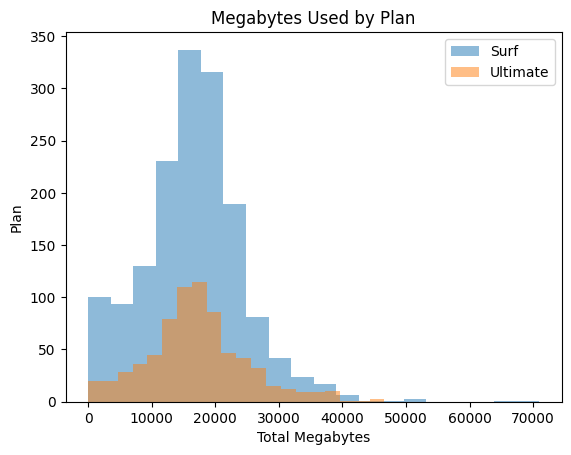

In [42]:
surf['mb_used'].plot.hist(bins=20, alpha=0.5, label='Surf')
ultimate['mb_used'].plot.hist(bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Total Megabytes')
plt.ylabel('Plan')
plt.title('Megabytes Used by Plan')
plt.legend()
plt.show()

the histogram above shows that the surf plan has far more megabytes used than the ultimate plan.

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [43]:
surf['total_charge'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_charge, dtype: float64

In [44]:
ultimate['total_charge'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_charge, dtype: float64

the surf plan max is 590 and the ultimate plan max is 182 so the surf plan is highest out of both.

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null Hypothesis (H0): ... is the same
Alternative Hypothesis (H1): ... is not the same

In [45]:
# Test the hypotheses

alpha = 0.05

results = st.ttest_ind(surf['total_charge'], ultimate['total_charge'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")


p-value:  2.862674510698644e-08
We reject the null hypothesis


In [46]:


stat_s, p_s = shapiro(surf['total_charge'])
print(f"Surf Plan Shapiro-Wilk Test p-value: {p_s}")


stat_u, p_u = shapiro(ultimate['total_charge'])
print(f"Ultimate Plan Shapiro-Wilk Test p-value: {p_u}")


alpha = 0.05
if p_s > alpha and p_u > alpha:
    results = ttest_ind(surf['total_charge'], ultimate['total_charge'], equal_var=False)
    test_used = "t-test"
else:
    results = mannwhitneyu(surf['total_charge'], ultimate['total_charge'], alternative='two-sided')
    test_used = "Mann-Whitney U test"


print(f"Statistical Test Used: {test_used}")
print(f"Statistic: {results.statistic}")
print(f"P-Value: {results.pvalue}")


if results.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between Surf and Ultimate plans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between Surf and Ultimate plans.")

Surf Plan Shapiro-Wilk Test p-value: 1.5414283107572988e-44
Ultimate Plan Shapiro-Wilk Test p-value: 0.0
Statistical Test Used: Mann-Whitney U test
Statistic: 355086.0
P-Value: 1.9121791624159787e-48
Reject the null hypothesis: There is a significant difference in average revenue between Surf and Ultimate plans.


We reject / fail to reject the null hypothesis...

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [47]:
df_merged

,user_id,month,total_minutes,message_count,mb_used,first_name,last_name,age,city,reg_date,...,usd_per_message,usd_per_minute,plan_name,extra_minutes,extra_messages,extra_mb,extra_minutes_charge,extra_messages_charge,extra_data_charge,total_charge
0,1000,12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
1,1006,11,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
2,1006,12,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,0.01,0.01,ultimate,0.0,0.0,1398.82,0.0,0.00,14.0,84.00
3,1008,10,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
4,1008,11,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,62.0,42866.10,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,...,0.03,0.03,surf,0.0,12.0,27506.10,0.0,0.36,270.0,290.36
2289,1194,12,0.0,56.0,31088.49,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,...,0.03,0.03,surf,0.0,6.0,15728.49,0.0,0.18,160.0,180.18
2290,1349,10,0.0,76.0,13093.55,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,0.03,0.03,surf,0.0,26.0,0.00,0.0,0.78,0.0,20.78
2291,1349,11,0.0,72.0,17128.26,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,0.03,0.03,surf,0.0,22.0,1768.26,0.0,0.66,20.0,40.66


In [48]:
df_merged['state'] = df_merged['city'].str[-6:].str[:2]

df_merged = df_merged.set_index('user_id')

df_merged.head()


,month,total_minutes,message_count,mb_used,first_name,last_name,age,city,reg_date,plan,...,usd_per_minute,plan_name,extra_minutes,extra_messages,extra_mb,extra_minutes_charge,extra_messages_charge,extra_data_charge,total_charge,state
user_id,,,,,,,,,,,,,,,,,,,,,
1000,12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,...,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0,GA
1006,11,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,...,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0,CA
1006,12,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,...,0.01,ultimate,0.0,0.0,1398.82,0.0,0.0,14.0,84.0,CA
1008,10,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,...,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0,FL
1008,11,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,...,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0,FL


In [49]:
#NY_NJ_income = df_merged[(df_merged['state']=='NY') | (df_merged['state']=='NJ')]['total_charge']
NY_NJ_income = df_merged[df_merged['city'].str.contains('NY-NJ')]['total_charge']
#Other_state_income = df_merged[(df_merged['state']!='NY') & (df_merged['state']!='NJ')]['total_charge']
Other_state_income = df_merged[~df_merged['city'].str.contains('NY-NJ')]['total_charge']

print('NY-NJ users monthly income:', np.var(NY_NJ_income))
print('Other state users monthly income:', np.var(Other_state_income))

NY-NJ users monthly income: 1890.5177172681153
Other state users monthly income: 2223.8866958162175


Average revenue of NY and NJ is higher than other states.

In [50]:
# Test the hypotheses

alpha = 0.05

results = st.ttest_ind(NY_NJ_income, Other_state_income)

print('p-value:', results.pvalue) 

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.04355743162134274
We reject the null hypothesis


In [51]:


stat_s, p_s = shapiro(NY_NJ_income)
print(f"Surf Plan Shapiro-Wilk Test p-value: {p_s}")


stat_u, p_u = shapiro(Other_state_income)
print(f"Ultimate Plan Shapiro-Wilk Test p-value: {p_u}")


alpha = 0.05
if p_s > alpha and p_u > alpha:
    results = ttest_ind(NY_NJ_income, Other_state_income, equal_var=False)
    test_used = "t-test"
else:
    results = mannwhitneyu(NY_NJ_income, Other_state_income, alternative='two-sided')
    test_used = "Mann-Whitney U test"


print(f"Statistical Test Used: {test_used}")
print(f"Statistic: {results.statistic}")
print(f"P-Value: {results.pvalue}")


if results.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between Surf and Ultimate plans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between Surf and Ultimate plans.")

Surf Plan Shapiro-Wilk Test p-value: 9.160523805778421e-20
Ultimate Plan Shapiro-Wilk Test p-value: 0.0
Statistical Test Used: Mann-Whitney U test
Statistic: 327910.0
P-Value: 0.0039281722381623845
Reject the null hypothesis: There is a significant difference in average revenue between Surf and Ultimate plans.


The null hypothesis cant be rejected and it states that the average revenue from the users in the NY and NJ states are equal to other user revenue from other states.

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Users on Surf plan go well beyond their limit each month unlike the users from Ultimate plan.

The average revenue from users in NY and NJ states are equal from revenue in other states.